In [4]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [9]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | punta umbria
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | ewa beach
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | griffith
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | sao gabriel da cachoeira
Processing Record 12 of Set 1 | sisimiut
Processing Record 13 of Set 1 | port hardy
Processing Record 14 of Set 1 | ojinaga
Processing Record 15 of Set 1 | zhigansk
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | cape town
Processing 

Processing Record 37 of Set 4 | kapiri mposhi
Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | belmonte
Processing Record 40 of Set 4 | ouricuri
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | kamaishi
Processing Record 43 of Set 4 | ossora
Processing Record 44 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 45 of Set 4 | mandalgovi
Processing Record 46 of Set 4 | san julian
Processing Record 47 of Set 4 | dunedin
Processing Record 48 of Set 4 | buin
Processing Record 49 of Set 4 | margate
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | toliary
City not found. Skipping...
Processing Record 3 of Set 5 | sault sainte marie
Processing Record 4 of Set 5 | martapura
Processing Record 5 of Set 5 | lompoc
Processing Record 6 of Set 5 | saskylakh
Processing Record 7 of Set 5 | mount isa
Processing Record 8 of Set 5 | edson
Processing Record 9 of Set 5 | honning

Processing Record 24 of Set 8 | yilan
Processing Record 25 of Set 8 | lagoa
Processing Record 26 of Set 8 | dabakala
Processing Record 27 of Set 8 | wukari
Processing Record 28 of Set 8 | abu dhabi
Processing Record 29 of Set 8 | ayacucho
Processing Record 30 of Set 8 | cartagena del chaira
Processing Record 31 of Set 8 | kizukuri
Processing Record 32 of Set 8 | rocky mountain house
Processing Record 33 of Set 8 | kloulklubed
Processing Record 34 of Set 8 | shar
Processing Record 35 of Set 8 | trinidad
Processing Record 36 of Set 8 | wad rawah
Processing Record 37 of Set 8 | berlevag
Processing Record 38 of Set 8 | bogo
Processing Record 39 of Set 8 | kenai
Processing Record 40 of Set 8 | pombas
Processing Record 41 of Set 8 | nishihara
Processing Record 42 of Set 8 | nicoya
Processing Record 43 of Set 8 | hihifo
City not found. Skipping...
Processing Record 44 of Set 8 | hede
Processing Record 45 of Set 8 | mpika
Processing Record 46 of Set 8 | walvis bay
Processing Record 47 of Set 8

Processing Record 8 of Set 12 | biltine
Processing Record 9 of Set 12 | santa pola
Processing Record 10 of Set 12 | dickinson
Processing Record 11 of Set 12 | tottori
Processing Record 12 of Set 12 | road town
Processing Record 13 of Set 12 | shenandoah
Processing Record 14 of Set 12 | great yarmouth
Processing Record 15 of Set 12 | uyskoye
Processing Record 16 of Set 12 | port hedland
Processing Record 17 of Set 12 | elliot lake
Processing Record 18 of Set 12 | san quintin
Processing Record 19 of Set 12 | hokitika
Processing Record 20 of Set 12 | santa ana
Processing Record 21 of Set 12 | jodhpur
Processing Record 22 of Set 12 | genhe
Processing Record 23 of Set 12 | ninghai
Processing Record 24 of Set 12 | talaya
Processing Record 25 of Set 12 | santarem
Processing Record 26 of Set 12 | aitape
Processing Record 27 of Set 12 | karpathos
Processing Record 28 of Set 12 | ingelheim
City not found. Skipping...
Processing Record 29 of Set 12 | coos bay
Processing Record 30 of Set 12 | tadi

In [11]:
len(city_data)

544

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,30.36,74,100,3.44,CA,2022-05-05 01:44:16
1,Punta Umbria,37.1821,-6.9661,58.23,72,0,7.94,ES,2022-05-05 01:51:52
2,Ewa Beach,21.3156,-158.0072,84.15,54,75,20.71,US,2022-05-05 01:51:53
3,Mar Del Plata,-38.0023,-57.5575,55.94,73,0,14.00,AR,2022-05-05 01:50:53
4,Carnarvon,-24.8667,113.6333,77.07,36,75,19.57,AU,2022-05-05 01:51:54
5,Coquimbo,-29.9533,-71.3436,55.13,94,0,4.61,CL,2022-05-05 01:51:54
6,Mataura,-46.1927,168.8643,62.47,53,53,2.86,NZ,2022-05-05 01:51:55
7,Griffith,41.5284,-87.4237,50.11,86,0,6.91,US,2022-05-05 01:51:55
8,Hilo,19.7297,-155.0900,78.28,96,100,10.36,US,2022-05-05 01:44:41
9,Sao Gabriel Da Cachoeira,-0.1303,-67.0892,74.08,94,83,4.27,BR,2022-05-05 01:51:56


In [14]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-05-05 01:44:16,55.7435,-97.8558,30.36,74,100,3.44
1,Punta Umbria,ES,2022-05-05 01:51:52,37.1821,-6.9661,58.23,72,0,7.94
2,Ewa Beach,US,2022-05-05 01:51:53,21.3156,-158.0072,84.15,54,75,20.71
3,Mar Del Plata,AR,2022-05-05 01:50:53,-38.0023,-57.5575,55.94,73,0,14.00
4,Carnarvon,AU,2022-05-05 01:51:54,-24.8667,113.6333,77.07,36,75,19.57
5,Coquimbo,CL,2022-05-05 01:51:54,-29.9533,-71.3436,55.13,94,0,4.61
6,Mataura,NZ,2022-05-05 01:51:55,-46.1927,168.8643,62.47,53,53,2.86
7,Griffith,US,2022-05-05 01:51:55,41.5284,-87.4237,50.11,86,0,6.91
8,Hilo,US,2022-05-05 01:44:41,19.7297,-155.0900,78.28,96,100,10.36
9,Sao Gabriel Da Cachoeira,BR,2022-05-05 01:51:56,-0.1303,-67.0892,74.08,94,83,4.27


In [15]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1651715764.261882

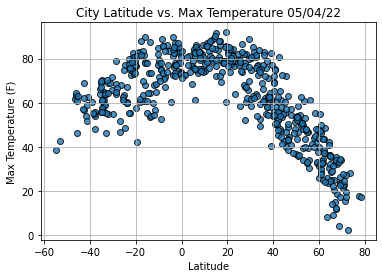

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


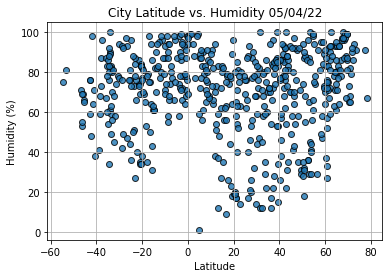

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

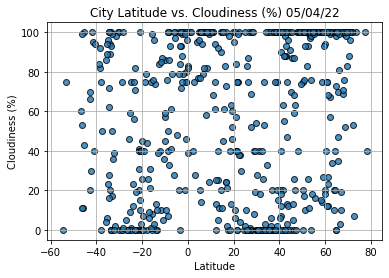

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

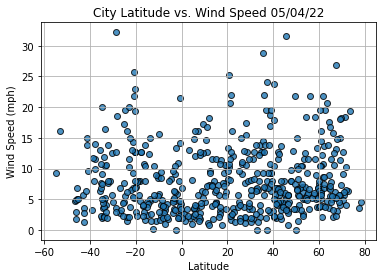

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress


In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                     Zhigansk
Country                        RU
Date          2022-05-05 01:45:18
Lat                       66.7697
Lng                      123.3711
Max Temp                    24.94
Humidity                       78
Cloudiness                     19
Wind Speed                  10.56
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0


0       True
1       True
2       True
3      False
4      False
       ...  
539     True
540     True
541     True
542     True
543    False
Name: Lat, Length: 544, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-05-05 01:44:16,55.7435,-97.8558,30.36,74,100,3.44
1,Punta Umbria,ES,2022-05-05 01:51:52,37.1821,-6.9661,58.23,72,0,7.94
2,Ewa Beach,US,2022-05-05 01:51:53,21.3156,-158.0072,84.15,54,75,20.71
7,Griffith,US,2022-05-05 01:51:55,41.5284,-87.4237,50.11,86,0,6.91
8,Hilo,US,2022-05-05 01:44:41,19.7297,-155.0900,78.28,96,100,10.36


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

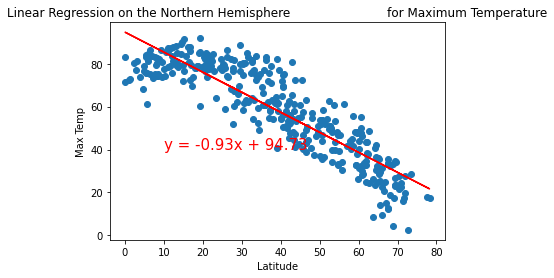

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

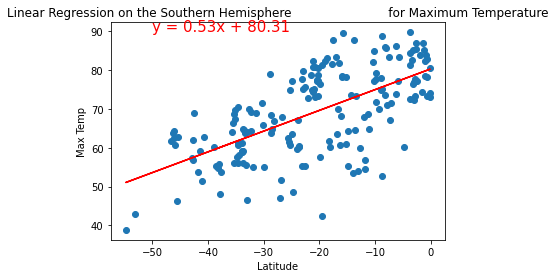

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

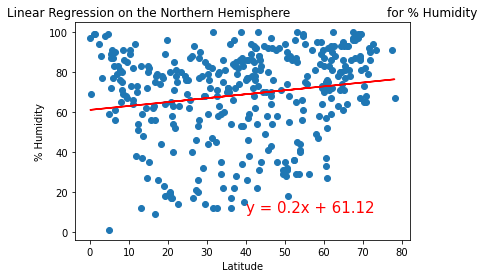

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

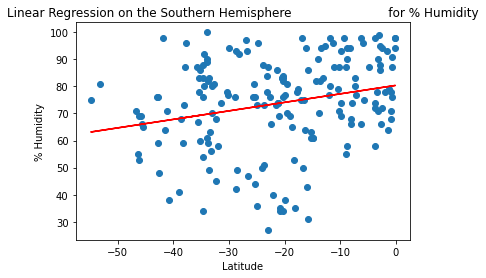

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

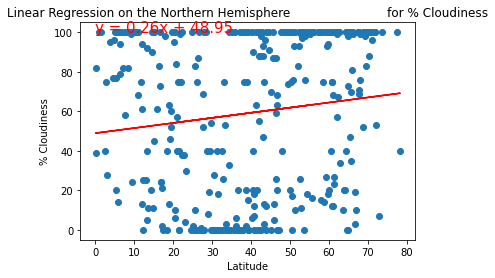

In [32]:
# Linear regression for cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,100))

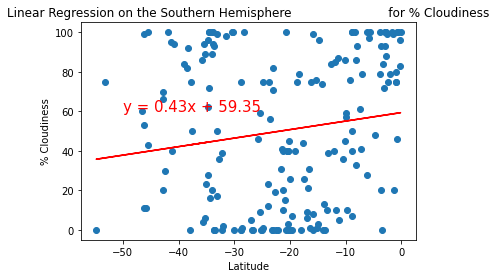

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

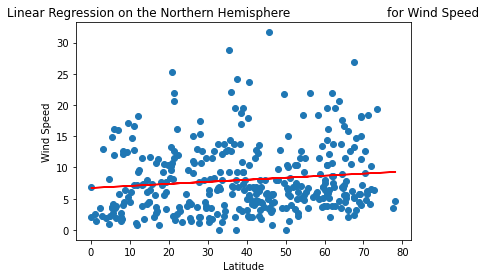

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

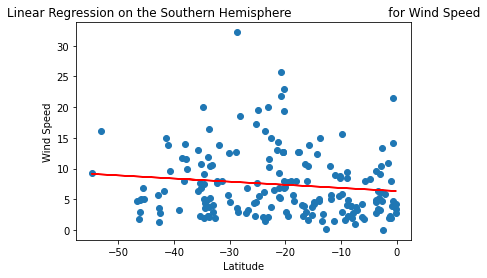

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))